In [2]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.layers import GRU
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Rainfall_Forecast.csv')
# Colab
df = pd.read_csv('/content/drive/MyDrive/StockData/MSFT1.csv')
df = df.drop(['Lag_1','Lag_2', 'Lag_3'],axis=1)
df['Lag_1']=df['Direction'].shift(1).copy()
df

,Date,Direction,Lag_1
0,6/6/2014,1,NaN
1,9/6/2014,0,1.0
2,10/6/2014,0,0.0
3,11/6/2014,0,0.0
4,12/6/2014,0,0.0
...,...,...,...
2256,23/5/2023,0,1.0
2257,24/5/2023,0,0.0
2258,25/5/2023,1,0.0
2259,26/5/2023,1,1.0


In [13]:
# View descriptive statistics of target variable
# Pandas will automatically ignore date if the correct data type has been converted
new_df = df
new_df.describe()

,Direction,Lag_1
count,2261.000000,2260.000000
mean,0.526316,0.526549
std,0.499417,0.499405
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [14]:
# Drop out missing values and rest index
clean_df=new_df.dropna(axis=0, how='any').copy()
clean_df=clean_df.reset_index(drop=True)
clean_df

,Date,Direction,Lag_1
0,9/6/2014,0,1.0
1,10/6/2014,0,0.0
2,11/6/2014,0,0.0
3,12/6/2014,0,0.0
4,13/6/2014,1,0.0
...,...,...,...
2255,23/5/2023,0,1.0
2256,24/5/2023,0,0.0
2257,25/5/2023,1,0.0
2258,26/5/2023,1,1.0


In [15]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(clean_df['Direction'], clean_df['Lag_1'])
testing_f1s=f1_score(clean_df['Direction'], clean_df['Lag_1'],pos_label=1)
testing_pre=precision_score(clean_df['Direction'], clean_df['Lag_1'],pos_label=1)
testing_sen=sensitivity_score(clean_df['Direction'], clean_df['Lag_1'],pos_label=1)
testing_spe=specificity_score(clean_df['Direction'], clean_df['Lag_1'],pos_label=1)
testing_cm=confusion_matrix(clean_df['Direction'], clean_df['Lag_1'])
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 47.74
Testing f1s: 50.36
Testing pre: 50.34
Testing sen: 50.38
Testing spe: 44.82

Testing confusion matrix:
[[480 591]
 [590 599]]


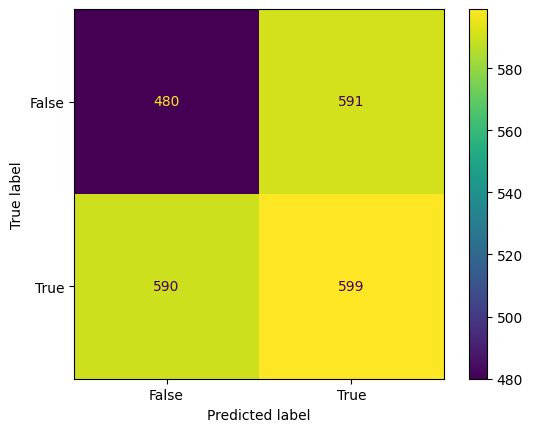

In [16]:
testing_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = testing_cm, display_labels = [False, True])
testing_cm_display.plot()
plt.show()

In [17]:
acc_NN = accuracy_score(clean_df['Direction'], clean_df['Lag_1'])
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.47743362831858405


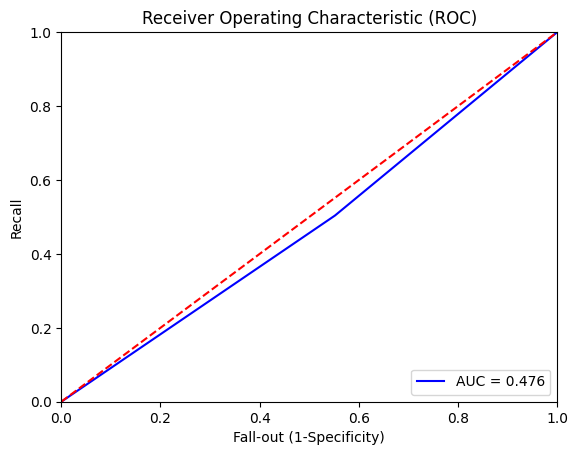

In [18]:
#Print Area Under Curve ROC/AUC,reporting AUC values
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(clean_df['Direction'], clean_df['Lag_1'])
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()